## DATA ANALYSIS USING JUPYTER LAB AND FRED API

A random project working with data from the Federal Reserve Economic Data (FRED) [website](https://fred.stlouisfed.org/). 

It is necessary to obtain a FRED api from the FRED website and, for that, a FRED account is required. The alternative to that is to manually import data from the website.

The process of obtaining the FRED api is fairly straight-forward and is well documented on the FRED website. it is of great importance to safeguard one's api once obtained as it is linked directly to one's account.


### Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred

plt.style.use('ggplot')
pd.set_option('display.max_columns',500)


### Environment variable, Fred Object

In the following step, we load the environment variable that enables the api to be read from the .env file stored in the same root directory:

In [2]:
#load environment variable
%load_ext dotenv
%dotenv
import os

#create Fred key to read securely stored api
Fred_key = os.getenv("FRED_API")

### Create the fred object

The fred object enables one obtain interactive with the FRED site:

In [6]:
fred = Fred(api_key=Fred_key)

### Importing data using the fred object method - .get_series()

We will try an example obatining data using the "CPIAUCSL" series ID as suggested by the get_series method documentation(Shift + TAB) The ID is Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

<AxesSubplot: >

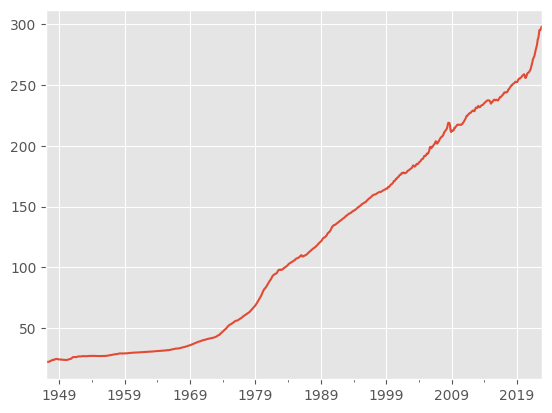

In [7]:
#Example obtaining data from the FRED site using the fred object.
Sticky =fred.get_series(series_id='CPIAUCSL')

#Plot sticky
Sticky.plot()

### Import unemployment data

The Fred object has .search() method that enables one search the FRED based on a text value. 

In [8]:
#Obtain employment data from the FRED site:
unemployment_data = fred.get_series(series_id='UNRATE', observation_start = '2015/1/1')
#name obtained data
unemployment_data.name = 'unemployment_data'

In [9]:
#inpsect the first five values:
unemployment_data.head()

2015-01-01    5.7
2015-02-01    5.5
2015-03-01    5.4
2015-04-01    5.4
2015-05-01    5.6
Name: unemployment_data, dtype: float64

<AxesSubplot: >

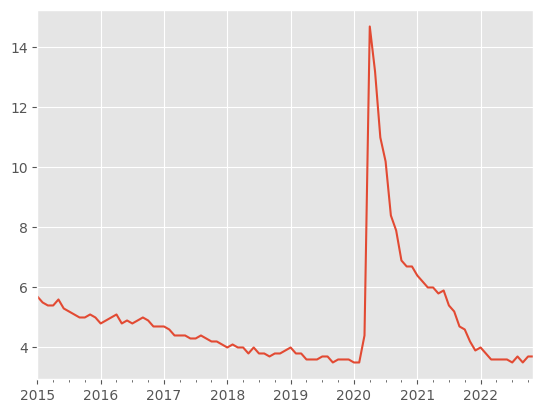

In [10]:
unemployment_data.plot()

In [11]:
### At the time of this project. the inflation data points were one less
#unemployment_data = unemployment_data.iloc[0:45]

In [12]:
unemployment_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 95 entries, 2015-01-01 to 2022-11-01
Series name: unemployment_data
Non-Null Count  Dtype  
--------------  -----  
95 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


### Import inflation data

In [14]:
mcpi = fred.get_series('MEDCPIM158SFRBCLE', observation_start='2015/1/1')
mcpi.name = 'mcpi'

In [15]:
mcpi.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 95 entries, 2015-01-01 to 2022-11-01
Series name: mcpi
Non-Null Count  Dtype  
--------------  -----  
95 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [16]:
### Summary statistics
mcpi.describe()

count    95.000000
mean      3.238658
std       1.711500
min       0.746659
25%       2.224901
50%       2.708417
75%       3.459871
max       9.222973
Name: mcpi, dtype: float64

In [17]:
mcpi.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 95 entries, 2015-01-01 to 2022-11-01
Series name: mcpi
Non-Null Count  Dtype  
--------------  -----  
95 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


<AxesSubplot: >

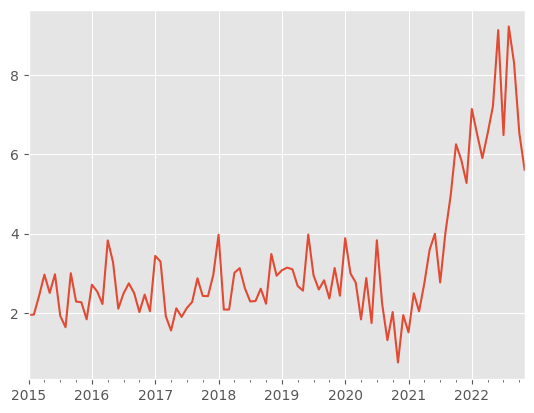

In [18]:
mcpi.plot()

### Merge data

In [19]:
unemp_mcpi = pd.merge(unemployment_data, mcpi, left_index =True, right_index = True)

In [20]:
unemp_mcpi.head(10)

,unemployment_data,mcpi
2015-01-01,5.7,1.947530
2015-02-01,5.5,1.954495
2015-03-01,5.4,2.433336
2015-04-01,5.4,2.962651
2015-05-01,5.6,2.501291
2015-06-01,5.3,2.972400
2015-07-01,5.2,1.922025
2015-08-01,5.1,1.635791
2015-09-01,5.0,2.998416
2015-10-01,5.0,2.283164


### Combined graph plot

<Figure size 1500x500 with 0 Axes>

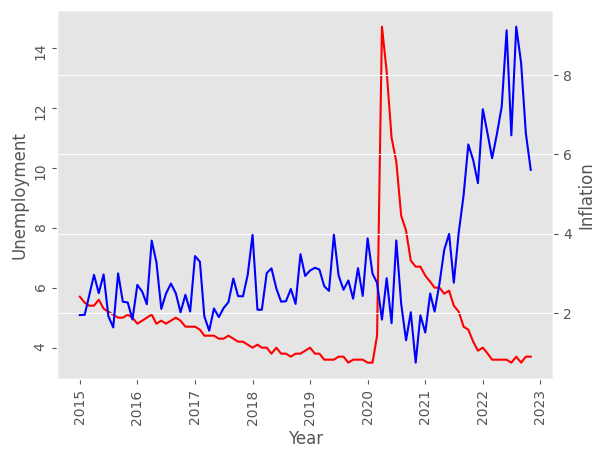

In [21]:
plt.figure(figsize=(15,5))
fig,ax = plt.subplots()
ax.plot(unemp_mcpi.index,
        unemp_mcpi.unemployment_data,
        color="red")
ax.tick_params(labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')
ax2=ax.twinx()
ax2.plot(unemp_mcpi.index, unemp_mcpi.mcpi,
         color="blue")
ax2.set_ylabel('Inflation')
ax.grid(False)
plt.show()

### The Phillips Curve

The Phillips curve is an economic theory that inflation and unemployment have a stable and inverse relationship. Disproved in the 1970s during a time of stagflation - high unemployment and high inflation.

[Text(0.5, 0, 'Unemployment'),
 Text(0, 0.5, 'Core Inflation'),
 Text(0.5, 1.0, 'Inflation - Unempolyment')]

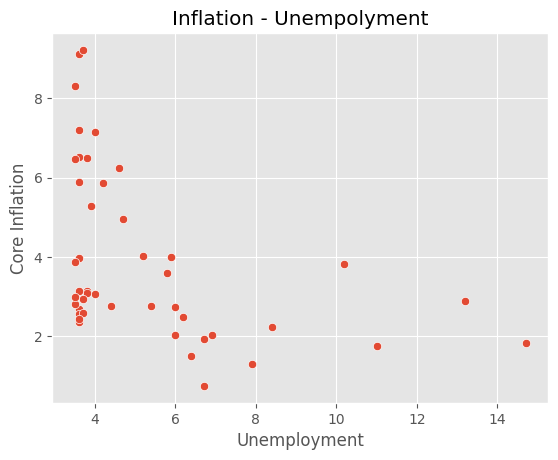

In [25]:
graph=sns.scatterplot(x='unemployment_data', y='mcpi', data =unemp_mcpi)
graph.set(xlabel = 'Unemployment', ylabel = 'Core Inflation', title = 'Inflation - Unempolyment')